# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [ ]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [88]:
import numpy as np
import pandas as pd

In [89]:
df = pd.read_csv('airline_sampled2.csv') 
# HW1에서 사용한 데이터를 샘플링한 파일이므로 꼭 제공된 csv 파일을 사용할 것

In [90]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,8827,8858,0,1,27,1,2,183,4,4,...,5,4,3,4,3,4,5,0,7.0,0
1,3588,3601,1,0,22,1,0,829,2,3,...,1,1,3,3,3,3,1,4,4.0,0
2,1011,1017,0,0,23,1,2,1020,4,5,...,4,3,4,5,3,5,4,0,0.0,1
3,7212,7237,1,0,21,1,0,1028,4,4,...,3,3,3,2,5,4,3,0,0.0,1
4,5025,5044,1,1,67,0,0,626,3,4,...,2,2,3,2,5,2,3,0,0.0,0


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (800, 24)
y_train's shape :  (800,)

X_val's shape :  (100, 24)
y_val's shape :  (100,)

X_test's shape :  (100, 24)
y_test's shape :  (100,)


## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

Text(0, 0.5, 'accuracy')

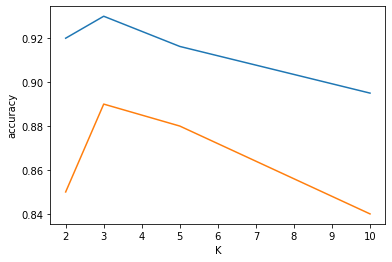

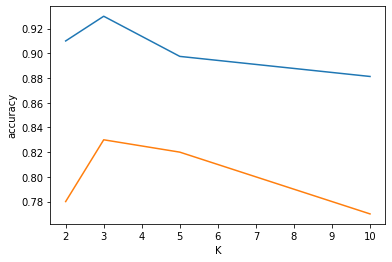

In [ ]:
### 문제 1 ###
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

K = [2,3,5,10]

train_acc_m = [] #맨해튼
train_acc_u = [] #유클리드

val_acc_m = []
val_acc_u = []

for i in K:
  classifier_m = KNeighborsClassifier(n_neighbors=i,p=1)
  classifier_u = KNeighborsClassifier(n_neighbors=i,p=2)

  classifier_m.fit(X_train,y_train)
  classifier_u.fit(X_train,y_train)

  train_acc_m.append(classifier_m.score(X_train,y_train)) 
  train_acc_u.append(classifier_u.score(X_train,y_train))

  val_acc_m.append(classifier_m.score(X_val,y_val))
  val_acc_u.append(classifier_u.score(X_val,y_val))


plt.figure()
plt.plot(K,train_acc_m,label='train accuracy')
plt.plot(K,val_acc_m,label='validation accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')

plt.figure()
plt.plot(K,train_acc_u,label='train accuracy')
plt.plot(K,val_acc_u,label='validation accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')
### 코드 작성 ###

In [ ]:
classifier_knn = KNeighborsClassifier(n_neighbors = 3 , p=1)
classifier_knn.fit(X_train,y_train)
print(classifier_knn.score(X_test,y_test))

0.85


**설명 작성**  
- 최적의 파라미터: K = 3
- 설명: 비교한 k값 중에 k가 3일 때 train과 validation의 정확도가 가장 높기 때문에 최적의 파라미터는 3이다.

---

## 문제2 Random Forest


- Scikit-learn 라이브러리를 이용하여 Random Forest의 최적의 파라미터를 찾는다.
    - Criterion 중 최소 두개를 비교한다.
    - 최적의 파라미터 max depth 값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 max depth 값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Text(0, 0.5, 'accuracy')

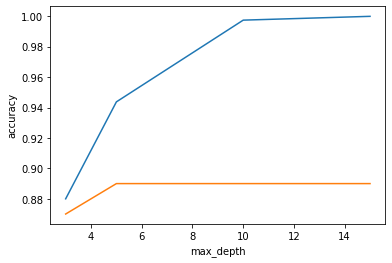

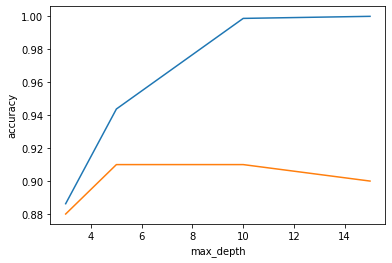

In [ ]:
### 문제 2 ###
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

max_depth = [3,5,10,15]

train_acc_e = []
train_acc_g = []

val_acc_e = []
val_acc_g = []

for i in max_depth:
  classifier_e = RandomForestClassifier(criterion = 'entropy',max_depth=i)
  classifier_g = RandomForestClassifier(criterion = 'gini',max_depth=i)

  classifier_e.fit(X_train,y_train)
  classifier_g.fit(X_train,y_train)

  train_acc_e.append(classifier_e.score(X_train,y_train))
  train_acc_g.append(classifier_g.score(X_train,y_train))

  val_acc_e.append(classifier_e.score(X_val,y_val))
  val_acc_g.append(classifier_g.score(X_val,y_val))

plt.figure()
plt.plot(max_depth,train_acc_e,label='train accuracy')
plt.plot(max_depth,val_acc_e,label='validation accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

plt.figure()
plt.plot(max_depth,train_acc_g,label='train accuracy')
plt.plot(max_depth,val_acc_g,label='validation accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
### 코드 작성 ###

In [ ]:
classifier_rf = RandomForestClassifier(criterion = 'entropy',max_depth=5)
classifier_rf.fit(X_train,y_train)
print(classifier_rf.score(X_test,y_test))

0.9


**설명 작성**  
- 최적의 파라미터: max_depth = 5
- 설명: max_depth가 10 이상일 때는 트리가 깊어질수록 구간이 잘게 쪼개지기 때문에 classifier가 overfitting 되고, validation accuracy가 적당히 높으면서 train accuracy가 overfitting 되어있지 않은 경우는 max_depth가 5인 경우이기 때문에 최적의 파라미터는 5이다.

---

## 문제3 Cross validation with Linear SVM
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

Text(0, 0.5, 'accuracy')

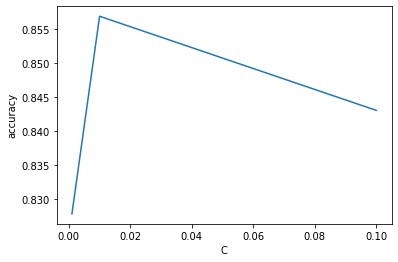

In [ ]:
### 문제 3-1 ###
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

X = df.drop('satisfaction', axis=1)
X = np.array(df.iloc[:,:-1])
y = df['satisfaction']
y= y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=1/10) #test set은 전체 데이터의 10%

sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C = [0.001,0.01,0.1]

kfold = KFold(n_splits = 5) #5-fold

cro_val_acc = []
for i in C:
  df_clf = SVC(kernel = 'linear', C=i)
  scores = cross_val_score(df_clf,X_train,y_train,scoring='accuracy',cv=kfold)
  cro_val_acc.append(np.mean(scores))

plt.figure()
plt.plot(C,cro_val_acc,label='cross-validation accuracy')
plt.xlabel('C')
plt.ylabel('accuracy')
### 코드 작성 ###

In [ ]:
SVM_test = SVC(kernel = 'linear', C=0.01)
SVM_test.fit(X_train,y_train)
SVM_test.score(X_test,y_test)

0.8611111111111112

**설명 작성**  
- 최적의 파라미터: C = 0.01
- 설명: cross_val_score 함수를 이용해 scores array에 각 fold 당 accuracy가 기록되고, 평균을 내어 그래프에 나타내 본 결과, C가 0.01일때 가장 accuracy가 높았다. 따라서 0.01이 최적의 파라미터이다.

Text(0, 0.5, 'accuracy')

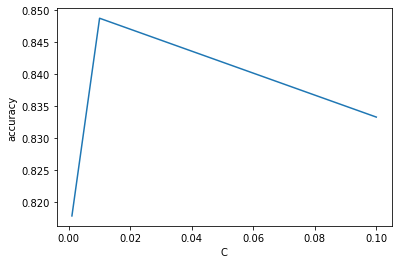

In [ ]:
### 문제 3-2 ###
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = df.drop('satisfaction', axis=1)
X = np.array(df.iloc[:,:-1])
y = df['satisfaction']
y= y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=1/10)

sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

loocv = LeaveOneOut() #loocv

cro_val_acc = []

C = [0.001,0.01,0.1]

for i in C:
  df_clf = SVC(kernel = 'linear', C=i)
  scores = cross_val_score(df_clf,X_train,y_train,scoring='accuracy',cv=loocv)
  cro_val_acc.append(np.mean(scores))

plt.figure()
plt.plot(C,cro_val_acc,label='cross_validation accuracy')
plt.xlabel('C')
plt.ylabel('accuracy')
### 코드 작성 ###

In [ ]:
SVM_test_loocv = SVC(kernel = 'linear', C=0.01)
SVM_test_loocv.fit(X_train,y_train)
SVM_test_loocv.score(X_test,y_test)

0.875

**설명 작성**  
- 최적의 파라미터: C = 0.01
- 설명: cross-validation accuracy가 다른 파라미터 값에 비해 0.01이 가장 높게 나왔기 때문에 최적의 파라미터는 0.01이다.

---

## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [209]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [210]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [211]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [212]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Adjusted R2 Score
- sklearn.metrics 패키지를 사용하여 ```def adjr2```에 Adjusted R2 Score를 구하는 함수를 작성한다.
- ```def r2```를 사용하여 ```adjr2```를 구현한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 함수 파라미터를 사용하여 구현한다.

In [ ]:
from sklearn.metrics import r2_score

In [176]:
import numpy as np

def r2(actual, predicted):
    """ R2 Score """
    return r2_score(actual, predicted)

###################################
def adjr2(actual, predicted, rowcount, featurecount):
############ 문제 4-1 ##############
    """ Adjusted R2 Score """
    return 1-(((rowcount -1)*(1-r2(actual,predicted)))/(rowcount-featurecount-1))
####################################
####################################

### 문제 4-2 : Feature Selection
- sklearn 패키지를 사용하여 feature selection을 수행하는 함수 ```forward_selection```을 구현한다.
- Linear Regressor 을 사용하여 feature selection이 어떻게 달라지는 지 관찰한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 변수들, 자료들을 최대한 활용하여 코드를 작성한다.

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
X = df.drop(columns=['target'])
y = df['target']
y=y.astype('int')
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [208]:
def forward_selection(X, y): # X: train data, y: train data's target
    initial_list = []
    included = list(initial_list) # 포함되어야 하는 feature
    best_r2 = 0 # 가장 높은 r2 score를 저장

    while True:
        
        changed = False # while 문을 빠져나가는 조건으로 활용
        excluded = list(set(X.columns)-set(included)) # included list에 없는 column names 저장하는 리스트
        new_scores = dict.fromkeys(excluded)

        for new_column in excluded:
            
            model = LinearRegression()

            ###########################################
            ###### 코드 작성 영역 외 수정 하지 말 것 #########
            ################ 문제 4-2 ################# #가장 영향력 있는(r2값이 가장 큰) feature  고르기 위해 계산해보기
            included.append(new_column)
            model.fit(X[included],y)
            pred = model.predict(X[included])
            new_scores[new_column] = adjr2(y,pred,20640,len(X[included].columns))
            included.pop()
        
        r2 = new_scores[max(new_scores, key=new_scores.get)]
        
        print(r2,best_r2)
        if (r2 > best_r2):
          included.append(max(new_scores, key=new_scores.get))
          best_r2 = r2
        else:
          break
        ############################################## 
        ##############################################
 
    return included

selected_features = forward_selection(X, y)
print('selected_features:', selected_features)

0.4536619019469599 0
0.48801962421560297 0.4536619019469599
0.49591370249396494 0.48801962421560297
0.5644471430899943 0.49591370249396494
0.5690844504987405 0.5644471430899943
0.5763966506064393 0.5690844504987405
0.5774588827179079 0.5763966506064393
0.5774395888934802 0.5774588827179079
selected_features: ['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'AveBedrms', 'AveRooms', 'AveOccup']


### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 문제 4-1의 **forward selection을 통해 얻은 feature만**을 가진 데이터를 사용한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np

In [236]:
### 문제 4-3 ###

X = df.drop(columns=['target','Population'])
y = df['target']
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]

r_val = dict.fromkeys(alpha)
l_val = dict.fromkeys(alpha)

r_r2 = []
l_r2 = []

for i in alpha:
  rid = Ridge(alpha = i)
  las = Lasso(alpha = i)

  rid.fit(X_train,y_train)
  las.fit(X_train,y_train)

  r_val[i] = rid.score(X_val,y_val)
  l_val[i] = las.score(X_val,y_val)

  r_pred = rid.predict(X_train)
  l_pred = las.predict(X_train)

  r_r2.append(r2_score(y_train,r_pred))
  l_r2.append(r2_score(y_train,l_pred))

print('Ridge의 최적 alpha :', max(r_val, key=r_val.get))
print('Lasso의 최적 alpha :', max(l_val, key=l_val.get))

### 코드 작성 ###

Ridge의 최적 alpha : 0.0001
Lasso의 최적 alpha : 0.0001


Text(0, 0.5, 'r2_score')

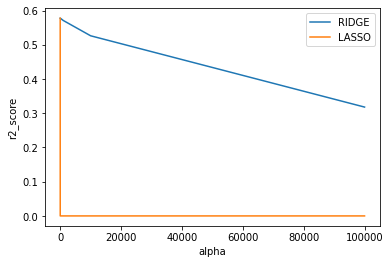

In [237]:
### 문제 4-3 ###
import matplotlib.pyplot as plt
plt.figure()
plt.plot(alpha,r_r2,label='RIDGE')
plt.plot(alpha,l_r2,label='LASSO')
plt.legend(('RIDGE','LASSO'))
plt.xlabel('alpha')
plt.ylabel('r2_score')
### 그래프 작성 ###

- Rridge regression 모델 최적의 alpha 값: 0.0001
- Lasso regression 모델 최적의 alpha 값: 0.0001

In [238]:
# 최종 결과 출력
X_train = pd.concat([X_train,X_val])
y_train = pd.concat([y_train,y_val])

rid_final = Ridge(alpha = 0.0001)
las_final = Lasso(alpha = 0.0001)

rid_final.fit(X_train,y_train)
las_final.fit(X_train,y_train)

print('train set에 대한 RIDGE prediction 결과 :', rid_final.predict(X_train))
print('test set에 대한 RIDGE prediction 결과 :', rid_final.predict(X_test))

print('train set에 대한 LASSO prediction 결과 :', las_final.predict(X_train))
print('test set에 대한 LASSO prediction 결과 :', las_final.predict(X_test))

train set에 대한 RIDGE prediction 결과 : [ 0.82989831  0.91643079  1.81902948 ...  0.91867517 -0.34043779
  0.80170269]
test set에 대한 RIDGE prediction 결과 : [1.3707479  2.64450111 2.55338831 ... 1.15649997 3.04583147 1.0273215 ]
train set에 대한 LASSO prediction 결과 : [ 0.83010843  0.91602236  1.81975369 ...  0.91788041 -0.34085186
  0.80189716]
test set에 대한 LASSO prediction 결과 : [1.37015569 2.64393581 2.55277776 ... 1.15643877 3.04492241 1.02658913]
